# Machine Learning Algorithms for Audio Classification

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [8]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    
    if (labels[i][6]%2 == 0):
        label = "Female"
    else:
        label = "Male"
        
    if (labels[i][2] == 1):
        emot = "neutral"
    elif (labels[i][2] == 2):
        emot = "calm"
    elif (labels[i][2] == 3):
        emot = "happy"
    elif (labels[i][2] == 4):
        emot = "sad"
    elif (labels[i][2] == 5):
        emot = "angry"
    elif (labels[i][2] == 6):
        emot = "fearful"
    elif (labels[i][2] == 7):
        emot = "disgust"
    elif (labels[i][2] == 8):
        emot = "surprised"
    
    features.append([audio_data[i], label, emot])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender", "emotion"])

feature_df.head()

,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm


In [38]:
X = np.array(feature_df.mfcc.tolist())

Y = np.array(feature_df.gender.tolist())

Y1 = np.array(feature_df.emotion.tolist())

# pca = sk.decomposition.PCA(n_components = 2).fit_transform(X)

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y1, test_size=0.25, random_state=0)

# Standard RF
rfc_gender = RandomForestClassifier()

rfc_gender.fit(x_train, y_train)

predictions_gen = rfc_gender.predict(x_test)

rfc_emotion = RandomForestClassifier()

rfc_emotion.fit(X_train, Y_train)

predictions_emot = rfc_emotion.predict(X_test)

Gender Classification
   Male  Female
0   177       6
1     5     172


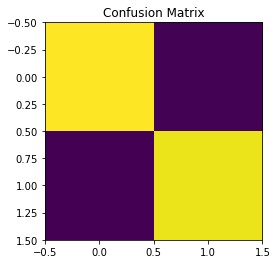

Emotion Classification
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0       26     1      8    0      6        0        0          4
1        0    39      1    0      0        5        9          0
2        3     7     20    2      3        3        4          4
3        5     1      5   22      2        2        3          7
4        3     1      2    8     16        0        6          6
5        0    11      0    0      2       10        5          0
6        2    12      3    4      2        2       18          2
7        2     0      3    3     10        2        2         31


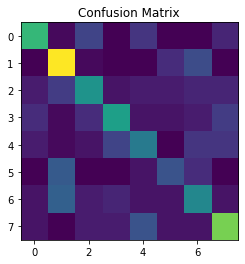

In [40]:
cm_gen = sk.metrics.confusion_matrix(y_test, predictions_gen)
cm_emot = sk.metrics.confusion_matrix(Y_test, predictions_emot)

print("Gender Classification")
df = pd.DataFrame(cm_gen, columns=[Y[0], Y[60]])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_gen)
plt.title("Confusion Matrix")
plt.show()

print("Emotion Classification")
df = pd.DataFrame(cm_emot, columns=[Y1[0], Y1[4], Y1[12], Y1[20], Y1[28], Y1[36], Y1[44], Y1[52] ])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm_emot)
plt.title("Confusion Matrix")
plt.show()

In [32]:
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(confmatrix)
    fp = np.sum(confmatrix, axis=0) - tp
    precision = np.mean(tp/(tp+fp))
    return precision

prec_gen = precision(cm_gen)
prec_emot = precision(cm_emot)

print("Classification by Gender Precision: " + str(prec_gen))
cr = sk.metrics.classification_report(y_test, predictions_gen)
print(cr)

print("Classification by Emotion Precision: " + str(prec_emot))
cr = sk.metrics.classification_report(Y_test, predictions_emot)
print(cr)

Classification by Gender Precision: 0.9722830951572579
              precision    recall  f1-score   support

      Female       0.98      0.96      0.97       183
        Male       0.96      0.98      0.97       177

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Classification by Emotion Precision: 0.4653170285118612
              precision    recall  f1-score   support

       angry       0.56      0.60      0.58        45
        calm       0.58      0.72      0.64        54
     disgust       0.45      0.41      0.43        46
     fearful       0.49      0.36      0.41        47
       happy       0.39      0.38      0.39        42
     neutral       0.38      0.36      0.37        28
         sad       0.33      0.36      0.34        45
   surprised       0.54      0.53      0.53        53

    accuracy                           0.48       360
   macro avg       0